In [2]:
import os
from google.colab import drive
drive.mount('/content/drive/')
cwd="/content/drive/MyDrive/Machine Learning"
os.chdir(cwd)


Mounted at /content/drive/


In [3]:
!pwd

/content/drive/MyDrive/Machine Learning


**First Step:**Reading dataset From cars.csv file examine how many features and examples does it have


----

In [4]:
import pandas as pd
# Read the dataset
file_path = 'cars.csv'
cars = pd.read_csv(file_path)
# Display the number of features and examples
num_features, num_examples = cars.shape
print(f"The dataset of cars has {num_features} features and {num_examples} examples.")
cars

The dataset of cars has 398 features and 8 examples.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,USA
394,44.0,4,97.0,52.0,2130,24.6,82,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,USA
396,28.0,4,120.0,79.0,2625,18.6,82,USA


**Second Step:** Finding the missing values in each features


---


In [ ]:
# Display features with missing values and the corresponding count
print("Features with missing values and their counts:")
print(cars.isnull().sum())

Features with missing values and their counts:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


In [ ]:
# Display exampls with missing values
print("Examples with missing values:")
print(cars[cars.isnull().any(axis=1)])

Examples with missing values:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
39   14.0          8         400.0       175.0    4464          11.5   
126  21.0          6         200.0         NaN    2875          17.0   
320  37.0          4         119.0        92.0    2434          15.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin  
32           71     USA  
39           71     NaN  
126          74     USA  
320          80     NaN  
330          80  Europe  
336          80     USA  
354          81  Europe  
374          82     USA  


**Third Step:** Filling the missing values in each feature using a proper imputation method (fill with mean, median, or mode)



---


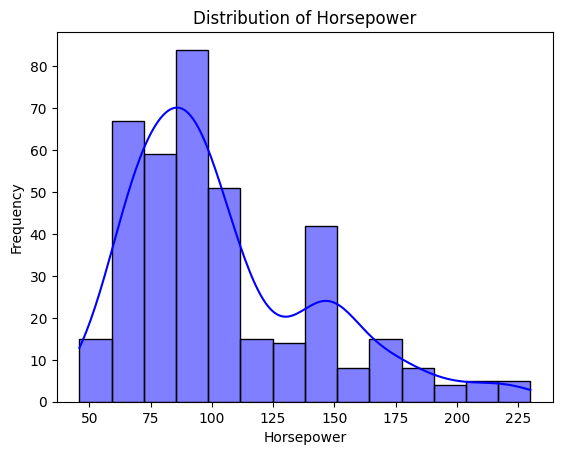

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  # Add this line

sns.histplot(cars['horsepower'].dropna(),color='blue',kde=True)
# Add labels and title
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
# Show the plot
plt.show()

Filling in the missing values in the horsepower column with a median value

In [ ]:
file_path = 'cars.csv'

# Display columns with missing values and the corresponding count
missing_values_horsepower = cars['horsepower'].isnull().sum()

if missing_values_horsepower > 0:
    print(f"Missing values in 'horsepower' column: {missing_values_horsepower}")

    # Fill missing values in 'horsepower' column with median
    median_horsepower = cars['horsepower'].median()
    cars['horsepower'].fillna(median_horsepower, inplace=True)

    # Save the modified Data back to the cars.csv file
    cars.to_csv(file_path, index=False)

    print("File updated.")
else:
    print("No missing values in 'horsepower' column.")


Missing values in 'horsepower' column: 6
File updated.


Filling in the missing values in the origin column with a mode value

In [ ]:
file_path = 'cars.csv'

missing_values_origin = cars['origin'].isnull().sum()

if missing_values_origin > 0:
    print(f"Missing values in 'origin' column: {missing_values_origin}")

    # Fill missing values in 'origin' column with mode
    mode_origin = cars['origin'].mode().iloc[0]
    cars['origin'].fillna(mode_origin, inplace=True)

    cars.to_csv(file_path, index=False)

    print("File updated.")
else:
    print("No missing values in 'origin' column.")


Missing values in 'origin' column: 2
File updated.


**Forth Step:** Comparing the fuel economy of cars produced by different countries.



----

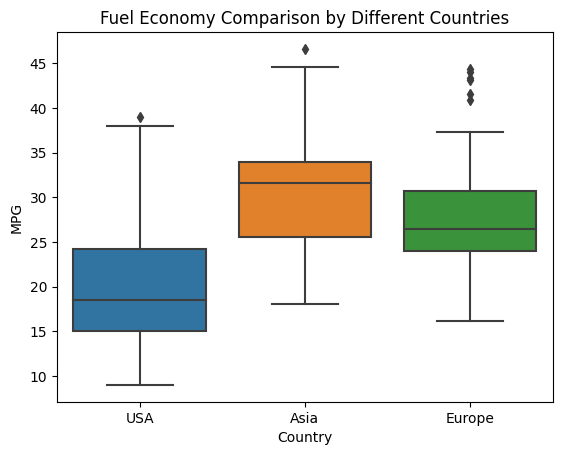

origin
Asia      31.55
Europe    26.50
USA       18.55
Name: mpg, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a box plot
sns.boxplot(x='origin', y='mpg', data=cars)

# Add labels and title
plt.title('Fuel Economy Comparison by Different Countries')
plt.xlabel('Country')
plt.ylabel('MPG')

# Show the plot
plt.show()

# Display the median for each country
print(cars.groupby('origin')['mpg'].median())



**Fifth Step:** This part showing
the histogram of each ‘acceleration’, ‘horsepower’ and ‘mpg’ feature.



----

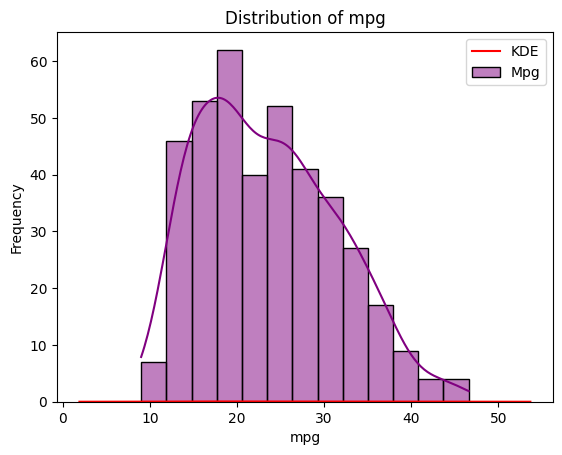

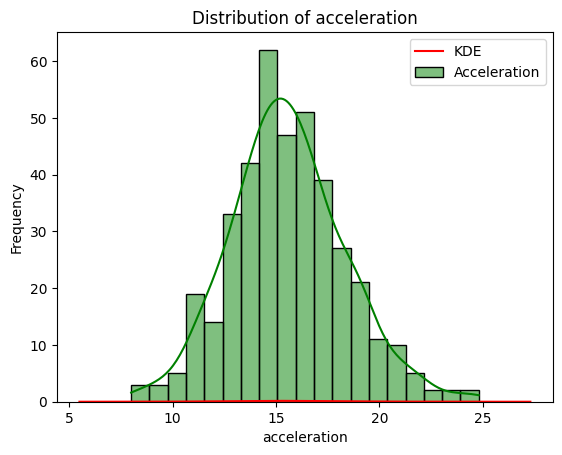

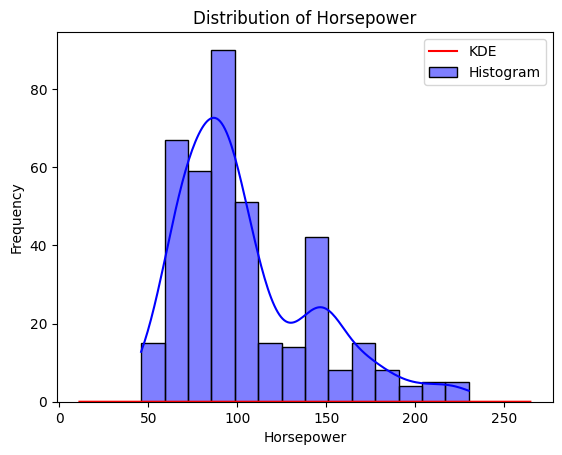

In [ ]:
import seaborn as sns

sns.histplot(cars['mpg'].dropna(),color='purple',kde=True,label='Mpg')
# Add KDE plot
sns.kdeplot(cars['mpg'], color='red', label='KDE')
# Add labels and title
plt.title('Distribution of mpg')
plt.xlabel('mpg')
plt.ylabel('Frequency')
# Add legend
plt.legend()
# Show the plot
plt.show()

sns.histplot(cars['acceleration'].dropna(),color='green',kde=True,label='Acceleration')
# Add KDE plot
sns.kdeplot(cars['acceleration'], color='red', label='KDE')
# Add labels and title
plt.title('Distribution of acceleration')
plt.xlabel('acceleration')
plt.ylabel('Frequency')
# Add legend
plt.legend()
# Show the plot
plt.show()

sns.histplot(cars['horsepower'].dropna(),color='blue',kde=True,label='Histogram')
# Add KDE plot
sns.kdeplot(cars['horsepower'], color='red', label='KDE')
# Add labels and title
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
# Add legend
plt.legend()
# Show the plot
plt.show()


**Sixth Step:** Support our answer for part 5 by using a quantitative measure.




----

In [ ]:
from scipy.stats import skew

features = ['mpg', 'acceleration', 'horsepower']

for feature in features:
    skewness = cars[feature].skew()
    print(f'{feature}: Skewness = {skewness}')

mpg: Skewness = 0.45706634399491913
acceleration: Skewness = 0.27877684462588986
horsepower: Skewness = 1.1062242930872614


**Seventh Step:** Scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis and the correlation between them.



----

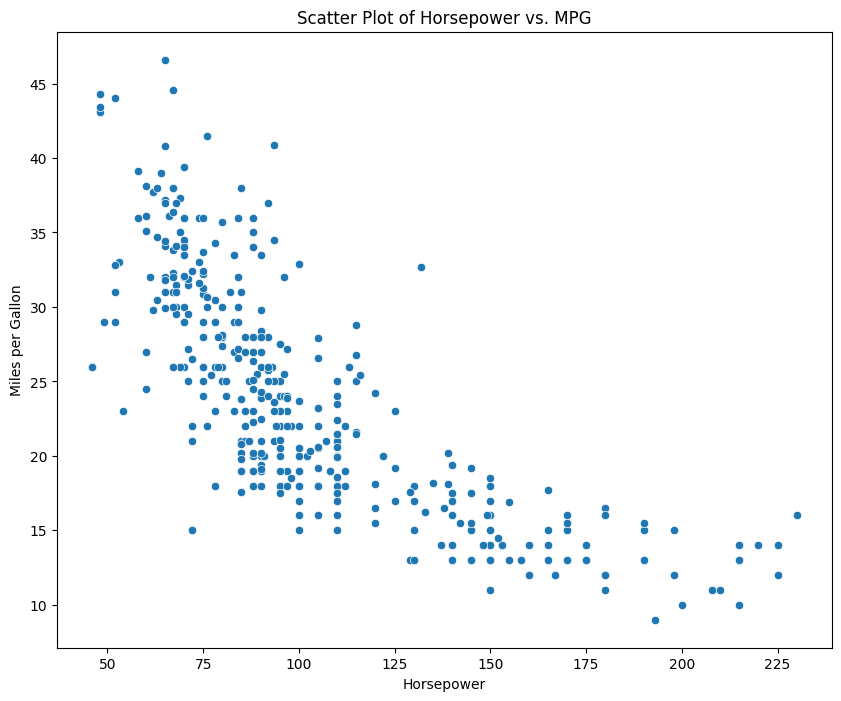

Correlation Coefficient: -0.7734532045742156


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Create a scatter plot
sns.scatterplot(x='horsepower', y='mpg', data=cars)

# Add labels and title
plt.title('Scatter Plot of Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')

# Show the plot
plt.show()

# Correlation
print(f"Correlation Coefficient: {cars['horsepower'].corr(cars['mpg'])}")


**Eighth Step:** Predicting'mpg' from 'horsepower' Using the closed form solution of linear regression, plot the learned line on a scatter plot.



----

Coefficient for w0: 40.01
Coefficient for w1: -0.16


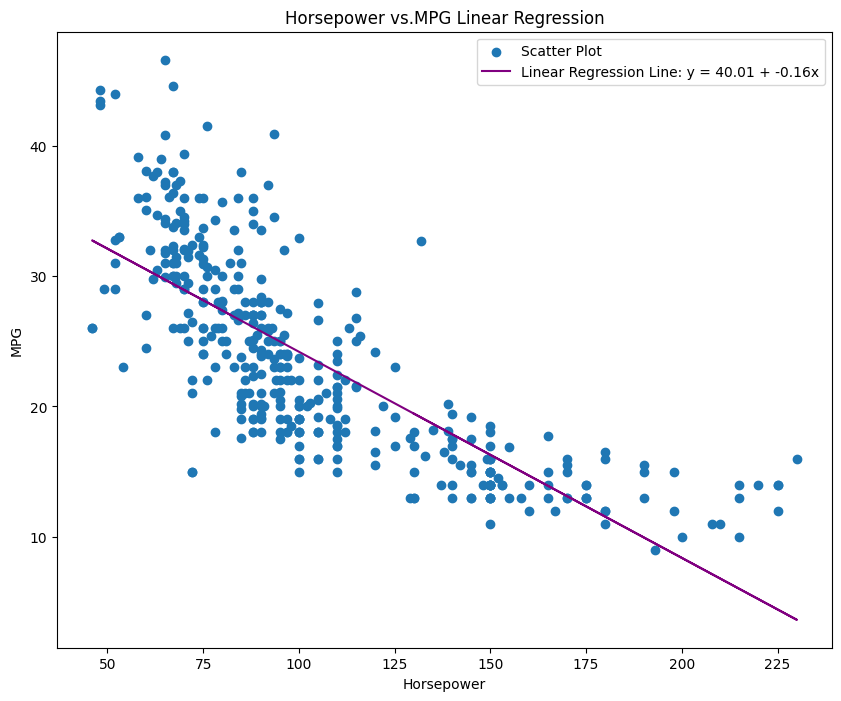

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract Features
X = cars[['horsepower']].values
y = cars[['mpg']].values # Target

# Add a column of ones to the left of our matrix
X = np.insert(X, 0, 1, axis=1)

# Closed form solution of linear regression
# np.linalg.inv for inverting a matrix
w = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract coefficients (w0, w1) from the parameter vector w using flatten().
w0, w1 = w.flatten()

# Print the learned coefficients for each feature
for i, coef in enumerate(w.flatten()):
    print(f'Coefficient for w{i}: {coef:.2f}')

plt.figure(figsize=(10, 8))
# Create a scatter plot
plt.scatter(X[:, 1], y, label='Scatter Plot')  # X[:, 1] Extracts the values from the second column "horsepower" of the matrix X
plt.title('Horsepower vs.MPG Linear Regression')
plt.ylabel('MPG')
plt.xlabel('Horsepower')

# Plot the learned line
plt.plot(X[:, 1], X @ w, label=f'Linear Regression Line: y = {w0:.2f} + {w1:.2f}x', color='purple')

# Add legend
plt.legend()

# Show the plot
plt.show()


**Ninth Step:** Repeat part 8 but now learn a quadratic function of the form
f = w0 + w1x + w2x2



----

Coefficient for w0: 56.78
Coefficient for w1: -0.46
Coefficient for w2: 0.00


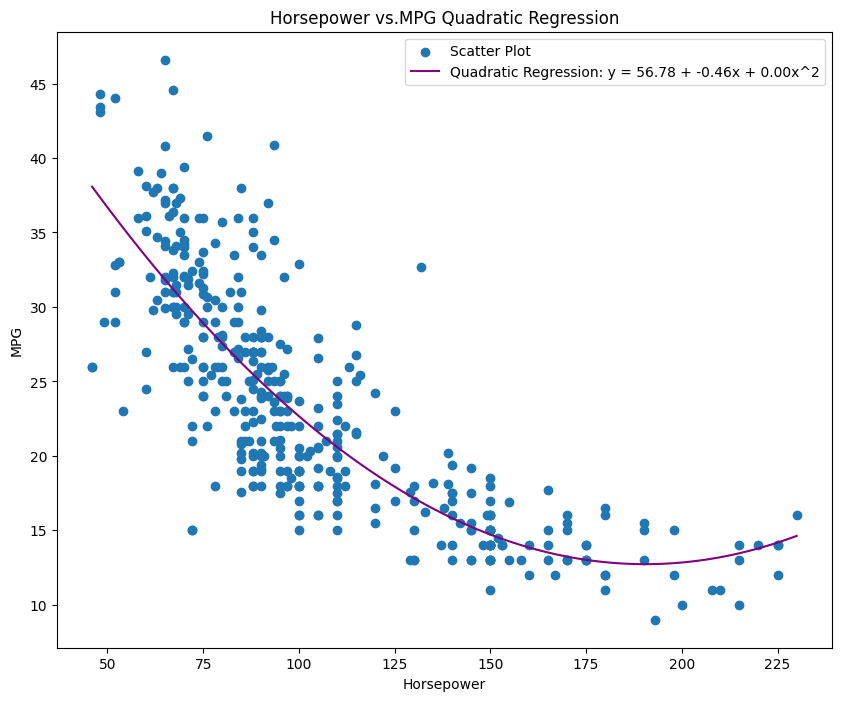

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract Features
X = cars[['horsepower']].values
y = cars[['mpg']].values

# Add a column of ones to matrix X
X = np.c_[np.ones_like(X), X, X**2]

# Closed-form solution for quadratic regression
w = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract coefficients (w0, w1, w2)
w0, w1, w2 = w.flatten()

# Print the learned coefficients for each feature
for i, coef in enumerate(w.flatten()):
    print(f'Coefficient for w{i}: {coef:.2f}')

plt.figure(figsize=(10, 8))
# Create a scatter plot
plt.scatter(X[:, 1], y, label='Scatter Plot')
plt.title('Horsepower vs.MPG Quadratic Regression')
plt.ylabel('MPG')
plt.xlabel('Horsepower')

# Plot the learned quadratic function
a = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
# Calculate the corresponding y-values for a quadratic curve
b = w2 * a**2 + w1 * a + w0

plt.plot(a,b, label=f'Quadratic Regression: y = {w0:.2f} + {w1:.2f}x + {w2:.2f}x^2', color='purple')

# Add legend
plt.legend()

# Show the plot
plt.show()


**Tenth Step:** Repeating part 8 (simple linear regression case) but now by implementing the gradient descent algorithm.



----

Converged after 716295 iterations
Coefficient for w0: 40.00
Coefficient for w1: -0.16


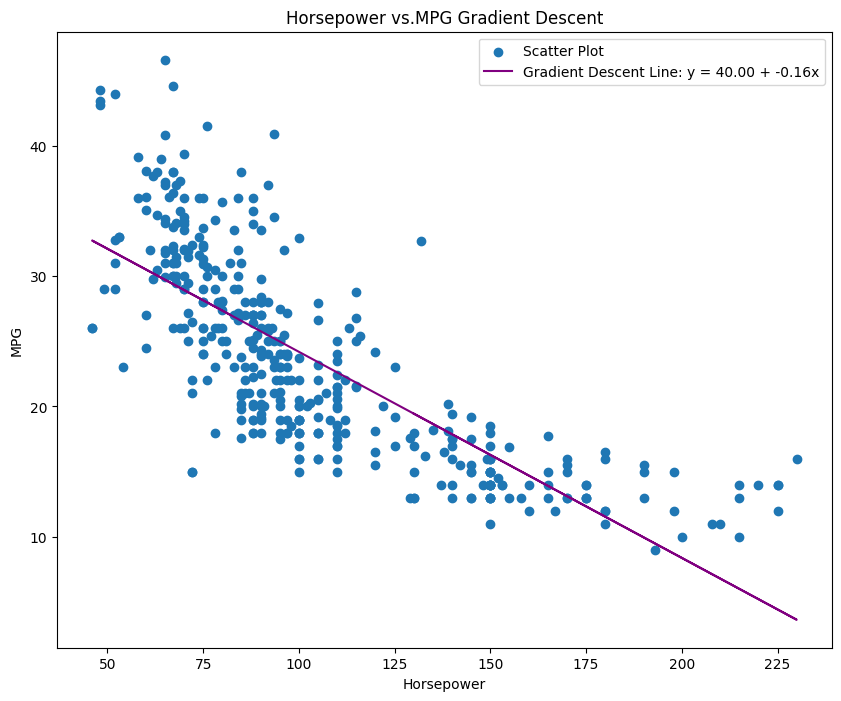

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Feature extraction
X = cars[['horsepower']].values
y = cars[['mpg']].values

# Add a column of ones to the left of our matrix
X = np.insert(X, 0, 1, axis=1)

# Initialize weights to zeros
w = np.zeros((X.shape[1], 1))

# Gradient Descent Parameters
learning_rate = 0.0001
num_iter = 1000000
tolerance = 1e-7

# Gradient Descent
for i in range(num_iter):
    # Calculate predictions
    pred = X @ w
    error = pred - y

    # Update weights
    w-= learning_rate * (X.T @ error) / len(y)

    # Check for convergence
    if np.linalg.norm(learning_rate * (X.T @ error) / len(y)) < tolerance:
        print(f"Converged after {i+1} iterations")
        break

# Extract w0 and w1
w0, w1 = w.flatten()

# Print the learned coefficients for each feature
for i, coef in enumerate(w.flatten()):
    print(f'Coefficient for w{i}: {coef:.2f}')

# Plot the learned line
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 1], y, label='Scatter Plot')
plt.plot(X[:, 1], X @ w, label=f'Gradient Descent Line: y = {w0:.2f} + {w1:.2f}x', color='purple')
plt.title('Horsepower vs.MPG Gradient Descent')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Add legend
plt.legend()

# Show the plot
plt.show()
